In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('../../dataset/intern_homework_train_dataset.csv')

<hr>

# Basic Information
- Head
- Shape
    - **50,000 rows and 18 columns**
- Column
- Data Type

In [2]:
print('Head:', df.head(), sep='\n', end='\n\n')
print('Shape:', df.shape, sep='\n', end='\n\n')
print('Column:', df.columns, sep='\n', end='\n\n')
print('Data Type:', df.dtypes, sep='\n')

Head:
      title               created_at  like_count_1h  like_count_2h  \
0     我的排骨湯  2022-10-05 14:20:21 UTC             12             15   
1  #請益 婚禮穿搭  2022-10-05 14:28:13 UTC              0              0   
2    無謂的啦啦隊  2022-10-06 07:18:22 UTC              3              7   
3   文學理論 課本  2022-09-20 11:39:14 UTC              2              7   
4      一般課程  2022-09-05 10:18:24 UTC              3              7   

   like_count_3h  like_count_4h  like_count_5h  like_count_6h  \
0             15             15             16             18   
1              3              4              4              4   
2              8             11             12             14   
3             11             24             26             26   
4              7             10             10             11   

   comment_count_1h  comment_count_2h  comment_count_3h  comment_count_4h  \
0                10                10                10                10   
1                 2         

<hr>

# Cleaning
- Missing Value
- Duplicates
- Data Type

## Missing Value
- **no missing value** -- Hooray!!!

In [3]:
nmiss = df.isna().sum().sum()
print('Missing Value:', nmiss, end='\n\n')

Missing Value: 0



## Duplicates
- **no duplicate** -- Hooray!!!
- 842 duplicates (by title)

In [4]:
df_nondup = df.drop_duplicates()
ndrop = len(df) - len(df_nondup)
print('Duplicate:', ndrop, end='\n\n')

df_nondup = df.drop_duplicates(subset='title')
ndrop = len(df) - len(df_nondup)
print('Duplicate (by title):', ndrop)

Duplicate: 0

Duplicate (by title): 842


## Data Type
- turn `forum_id` and `author_id` columns from numeric into category (based on Dcard's README)
- turn `created_at` column from object into datetime (and change timezone from UTC+0 to +8)

In [5]:
df[['forum_id', 'author_id']] = df[['forum_id', 'author_id']].astype('category')
df['created_at'] = pd.to_datetime(df['created_at']).dt.tz_convert(tz='ROC')

In [6]:
print('Data Type (post-cleaning):', df.dtypes, sep='\n')

Data Type (post-cleaning):
title                            object
created_at          datetime64[ns, ROC]
like_count_1h                     int64
like_count_2h                     int64
like_count_3h                     int64
like_count_4h                     int64
like_count_5h                     int64
like_count_6h                     int64
comment_count_1h                  int64
comment_count_2h                  int64
comment_count_3h                  int64
comment_count_4h                  int64
comment_count_5h                  int64
comment_count_6h                  int64
forum_id                       category
author_id                      category
forum_stats                     float64
like_count_24h                    int64
dtype: object


<hr>

# Variable Details
- Text
    - `title` column
- Category
    - `forum_id` column
    - `author_id` column
- Datetime
    - `created_at` column
- Numeric
    - `like_count` / `comment_count` column
    - `forum_stats` column

## Text

### title
- find titles which are used the most
    - **6 titles are used >10 times**: '.', '推甄請益', '(´･ω･`)', '地震', '學餐', '請問這是什麼車'
    - **title '.' are used 72 times** (the most)
- separate meaningless titles **with the combination of numbers, marks, emojis, and only one chinese character** from others (the opposite are titles which contain alphabets or more than two chinese characters): `title_w_mean` and `title_wo_mean`
    - **501 samples with meaningless titles** (about 1%)
- **🔥THOUGHTS🔥**
    - predict samples with meaningless titles should ignore `title` column

Number of Titles:
.                        72
推甄請益                     19
(´･ω･`)                  18
地震                       16
學餐                       12
                         ..
#分享 13人13色個性－番外篇          1
macbook air有沒有推薦的外接螢幕     1
想緊緊抱著妳                    1
有沒有適合萬聖節搭配的球鞋推薦R?         1
#iPhone 更新失敗              1
Name: title, Length: 49158, dtype: int64



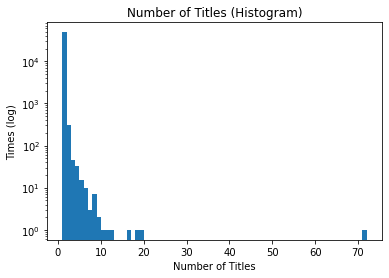

Title (>10):
.          72
推甄請益       19
(´･ω･`)    18
地震         16
學餐         12
請問這是什麼車    11
Name: title, dtype: int64


<Figure size 432x288 with 0 Axes>

In [7]:
# draw number of titles histogram
ntitle = df['title'].value_counts()
print('Number of Titles:', ntitle, sep='\n', end='\n\n')
bins = np.arange(min(ntitle), max(ntitle) + 1, 1)
plt.hist(ntitle, bins=bins)
plt.yscale('log')
plt.xlabel('Number of Titles')
plt.ylabel('Times (log)')
plt.title('Number of Titles (Histogram)')
plt.show()
plt.clf()

# find titles which are used more than 10 times
ntitle_more = ntitle[ntitle > 10]
print("Title (>10):", ntitle_more, sep = '\n')

In [8]:
# separate meaningful titles from others
title = df['title'].str.replace(' ', '',regex=True)
ind_alpha = title.str.contains('[A-Za-z]', regex=True)
ind_chi = title.str.contains('[\u4e00-\u9FFF][\u4e00-\u9FFF]', regex=True)
title_w_mean = title[ind_alpha | ind_chi]
title_wo_mean = title[~(ind_alpha | ind_chi)]
print('Meaningless Title:', title_wo_mean, sep='\n')

Meaningless Title:
20              .
47              😭
48             ⚠️
149      _(:3」∠)_
159           ？？？
           ...   
49546          ㄟㄟ
49593           累
49800           嗨
49867           🙂
49888           ，
Name: title, Length: 501, dtype: object


In [9]:
# separate meaningful titles from others
title = df['title'].str.replace(' ', '',regex=True)
ind_alpha = title.str.contains('[A-Za-z]', regex=True)
ind_chi = title.str.contains('[\u4e00-\u9FFF][\u4e00-\u9FFF][\u4e00-\u9FFF]', regex=True)
title_w_mean = title[ind_alpha | ind_chi]
title_wo_mean = title[~ind_chi]
print('Meaningless Title:', title_wo_mean.head(50), sep='\n')

Meaningless Title:
20                                  .
32                              雅思7.5
47                                  😭
48                                 ⚠️
75                                 欸欸
81                       #iPhonei13購買
87                             資遣or離職
97                                 金天
112                       (更)新手TNR(文長
148                     まじで意味わかんない男の話
149                          _(:3」∠)_
159                               ？？？
196                             TPL社群
204                                拉拉
214                                晨跑
215                            紅27違停🐒
218                                排名
237                            紐約VS倫敦
246                         廣達offer請益
247                               101
292                                 .
314                                活動
319    向いていないと言っておきながら、結局アプリで恋人できました🥹
341                                尋人
343                       eLearn壞了！！！
346                            

In [70]:
# ind_num = title.str.fullmatch('^[0-9\s]+$')
# ind_alpha = title.str.fullmatch('^[A-Za-z\s]+$')
# ind_chi = title.str.fullmatch('^[\u4e00-\u9FFF\U00010000-\U0010ffff]+$')

## Category

### forum_id
- find frequency of numbers of forum ids
- separate forum ids by median of numbers of forum ids
    - **median is 3**
    - **960 samples with forum id which happens <=3 times** (about 1.9%)
- **🔥THOUGHTS🔥**
    - predict samples with forum id which happens <=3 times should ignore `forum_id` column

Number of Forum IDs:
817817    2531
676371    2027
156928    1841
497426    1840
687605    1596
          ... 
526102       1
533084       1
536449       1
543688       1
998778       1
Name: forum_id, Length: 1147, dtype: int64



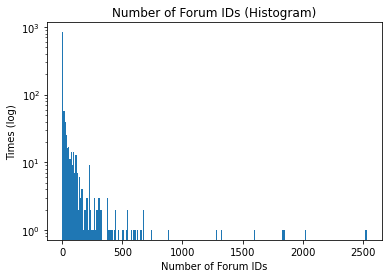

<Figure size 432x288 with 0 Axes>

In [10]:
# draw number of forum ids histogram
nforum = df['forum_id'].value_counts()
print('Number of Forum IDs:', nforum, sep='\n', end='\n\n')
bins = np.arange(min(nforum), max(nforum) + 10, 10)
plt.hist(nforum, bins=bins)
plt.yscale('log')
plt.xlabel('Number of Forum IDs')
plt.ylabel('Times (log)')
plt.title('Number of Forum IDs (Histogram)')
plt.show()
plt.clf()

In [11]:
# separate forum id by median of numbers of forum ids
print('Number of Forum IDs (median):', nforum.quantile(0.5), end='\n\n')
nforum_more = nforum[nforum > 3]
nforum_less = nforum[nforum <= 3]
print('Number of Samples with Forum ID which happens >3 times:', sum(nforum_more), end='\n\n')
print('Number of Samples with Forum ID which happens <=3 times:', sum(nforum_less))

Number of Forum IDs (median): 3.0

Number of Samples with Forum ID which happens >3 times: 49040

Number of Samples with Forum ID which happens <=3 times: 960


### author_id
- find frequency of numbers of author ids
- separate author ids by median of numbers of author ids
    - **median is 1**
    - **25,323 samples with Forum ID which happens 1 time** (about 50.6%)
- **🔥THOUGHTS🔥**
    - `author_id` might need to be broken into groups, such as school, department, name, as dropping 50.6% of samples is not feasible

Number of Author IDs:
669355    88
335088    79
156136    74
594619    73
564812    68
          ..
370855     1
370834     1
370731     1
370693     1
999998     1
Name: author_id, Length: 32280, dtype: int64



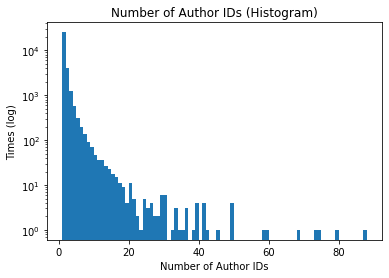

<Figure size 432x288 with 0 Axes>

In [12]:
# draw number of author ids histogram
nauthor = df['author_id'].value_counts()
print('Number of Author IDs:', nauthor, sep='\n', end='\n\n')
bins = np.arange(min(nauthor), max(nauthor) + 1, 1)
plt.hist(nauthor, bins=bins)
plt.yscale('log')
plt.xlabel('Number of Author IDs')
plt.ylabel('Times (log)')
plt.title('Number of Author IDs (Histogram)')
plt.show()
plt.clf()

In [13]:
# separate author id by median of numbers of author ids
print('Number of Author IDs (median):', nauthor.quantile(0.5), end='\n\n')
nauthor_more = nauthor[nauthor > 1]
nauthor_less = nauthor[nauthor <= 1]
print('Number of Samples with Author ID which happens >1 times:', sum(nauthor_more), end='\n\n')
print('Number of Samples with Author ID which happens 1 time:', sum(nauthor_less))

Number of Author IDs (median): 1.0

Number of Samples with Author ID which happens >1 times: 24677

Number of Samples with Author ID which happens 1 time: 25323


## Datetime

### created_at
- find frequency of create date
    - **one-week period**
- create new dataframe for create time: `month`, `weekday`, `period`
- find frequency of create weekday
    - **Weekday > Weekend**
- find frequency of create period
    - **Evening > Afternoon > Morning > Midnight**
- find frequency of create weekday and period
- **🔥THOUGHTS🔥**
    - `created_at`'s day should be converted into weekday due to one-week period
    - `created_at`'s weekday, hour, (month) are influential variable

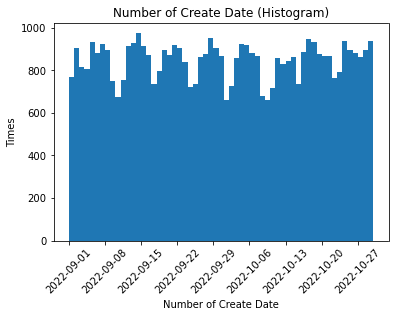

<Figure size 432x288 with 0 Axes>

In [14]:
# draw number of create date histogram
create_date = pd.to_datetime(df['created_at']).dt.date
bins = pd.date_range(start=min(create_date), end=max(create_date), freq='D')
xticks = pd.date_range(start=min(create_date), end=max(create_date), freq='7D').date
plt.hist(create_date, bins=bins)
plt.xticks(xticks, xticks, rotation=45)
plt.xlabel('Number of Create Date')
plt.ylabel('Times')
plt.title('Number of Create Date (Histogram)')
plt.show()
plt.clf()

In [15]:
# create new dataframe of create datetime
create = df['created_at']
df_create = pd.DataFrame({'month': create.dt.month,
                          'day': create.dt.day,
                          'hour': create.dt.hour,
                          'weekday': create.dt.weekday})
wd_code = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
wd = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
prd = ['Morning', 'Afternoon', 'Evening', 'Midnight']
df_create['weekday'] = df_create['weekday'].replace(wd_code)
df_create['weekday'] = pd.Categorical(df_create['weekday'], categories=wd, ordered=True)
df_create['period'] = np.where(df_create['hour'].between(2, 8, inclusive='left'), 'Midnight',
                      np.where(df_create['hour'].between(8, 14, inclusive='left'), 'Morning',
                      np.where(df_create['hour'].between(14, 20, inclusive='left'), 'Afternoon', 'Evening')))
df_create['period'] = pd.Categorical(df_create['period'], categories=prd, ordered=True)
print('Create Datetime Dataframe:', df_create, sep='\n')

ind_sep_oct = (df_create['month'] == 10) & (df_create['day'] > 26)
df_create_sep_oct = df_create[~ind_sep_oct]
ind_sep = (df_create['month'] == 9) & (df_create['day'] < 29)
df_create_sep = df_create[ind_sep]
ind_oct = (df_create['month'] == 10) & (df_create['day'] < 29)
df_create_oct = df_create[ind_oct]

Create Datetime Dataframe:
       month  day  hour weekday     period
0         10    5    22     Wed    Evening
1         10    5    22     Wed    Evening
2         10    6    15     Thu  Afternoon
3          9   20    19     Tue  Afternoon
4          9    5    18     Mon  Afternoon
...      ...  ...   ...     ...        ...
49995      9   21    23     Wed    Evening
49996      9   26    13     Mon    Morning
49997     10   10    23     Mon    Evening
49998      9   19    20     Mon    Evening
49999      9   13    11     Tue    Morning

[50000 rows x 5 columns]


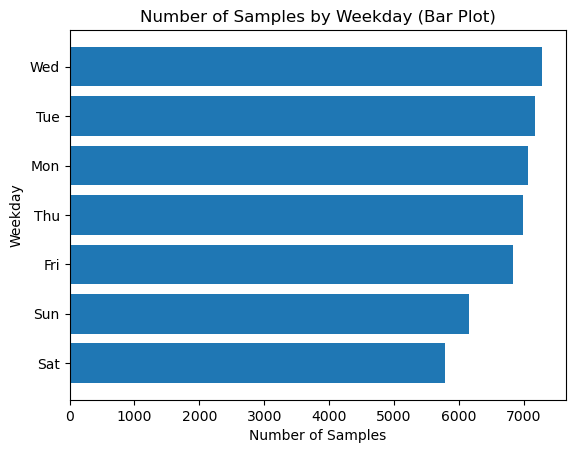

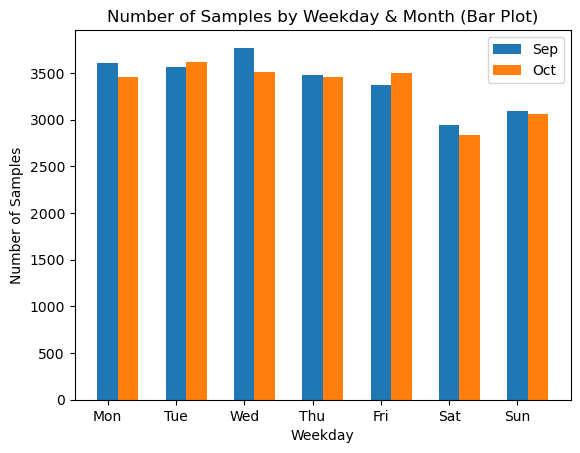

<Figure size 640x480 with 0 Axes>

In [16]:
# draw number of samples by weekday bar plot
## Sep + Oct
ncreate_wd = df_create_sep_oct['weekday'].value_counts(sort=False)
ncreate_wd_sort = ncreate_wd.sort_values()
plt.barh(ncreate_wd_sort.index, ncreate_wd_sort)
plt.xlabel('Number of Samples')
plt.ylabel('Weekday')
plt.title('Number of Samples by Weekday (Bar Plot)')
plt.show()
plt.clf()
## Sep / Oct
ncreate_wd_sep = df_create_sep['weekday'].value_counts(sort=False)
ncreate_wd_oct = df_create_oct['weekday'].value_counts(sort=False)
x = np.arange(len(ncreate_wd))
width = 0.3
plt.bar(x, ncreate_wd_sep, width=width, label='Sep')
plt.bar(x + width, ncreate_wd_oct, width=width, label='Oct')
plt.xticks(x, ncreate_wd.index)
plt.xlabel('Weekday')
plt.ylabel('Number of Samples')
plt.title('Number of Samples by Weekday & Month (Bar Plot)')
plt.legend()
plt.show()
plt.clf()

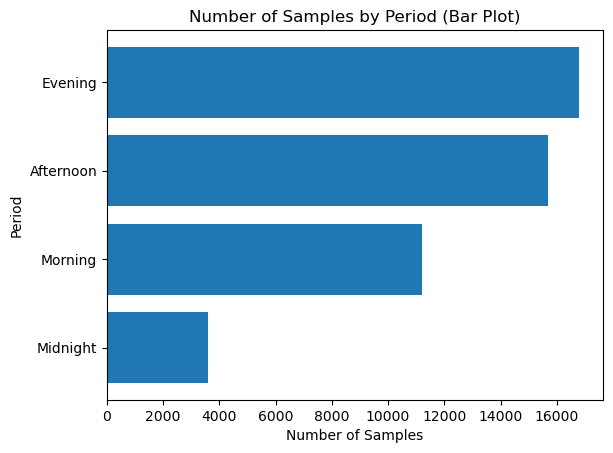

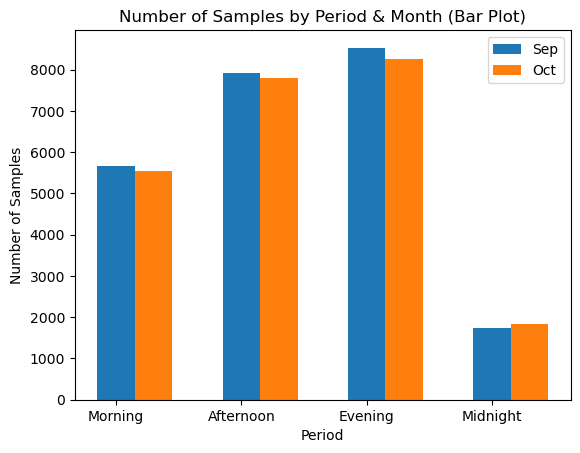

<Figure size 640x480 with 0 Axes>

In [17]:
# draw number of samples by period bar plot
## Sep + Oct
ncreate_prd = df_create_sep_oct['period'].value_counts(sort=False)
ncreate_prd_sort = ncreate_prd.sort_values()
plt.barh(ncreate_prd_sort.index, ncreate_prd_sort)
plt.xlabel('Number of Samples')
plt.ylabel('Period')
plt.title('Number of Samples by Period (Bar Plot)')
plt.show()
plt.clf()
## Sep / Oct
ncreate_prd_sep = df_create_sep['period'].value_counts(sort=False)
ncreate_prd_oct = df_create_oct['period'].value_counts(sort=False)
x = np.arange(len(ncreate_prd))
width = 0.3
plt.bar(x, ncreate_prd_sep, width=width, label='Sep')
plt.bar(x + width, ncreate_prd_oct, width=width, label='Oct')
plt.xticks(x, ncreate_prd.index)
plt.xlabel('Period')
plt.ylabel('Number of Samples')
plt.title('Number of Samples by Period & Month (Bar Plot)')
plt.legend()
plt.show()
plt.clf()

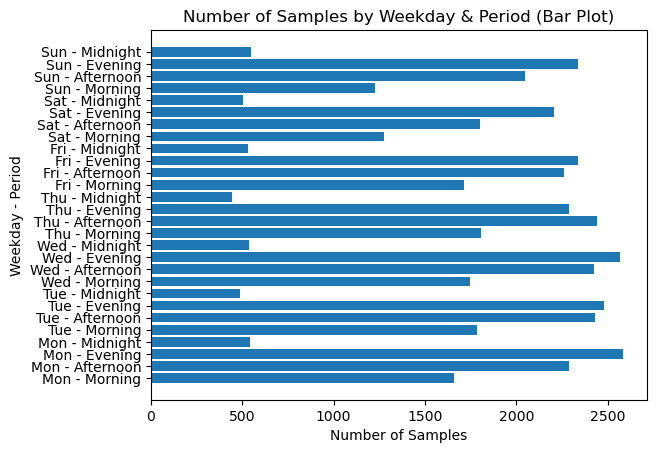

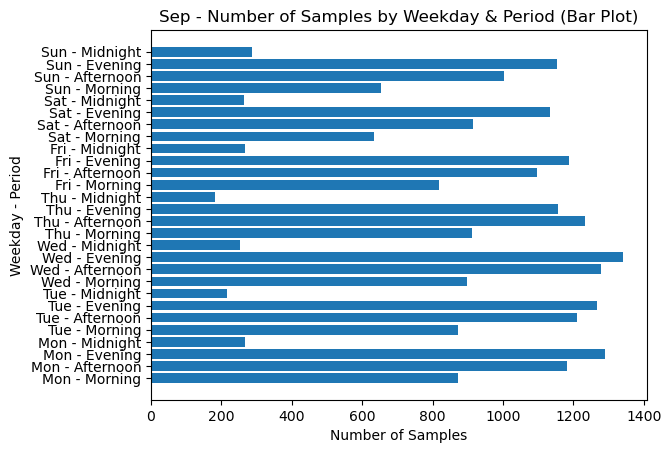

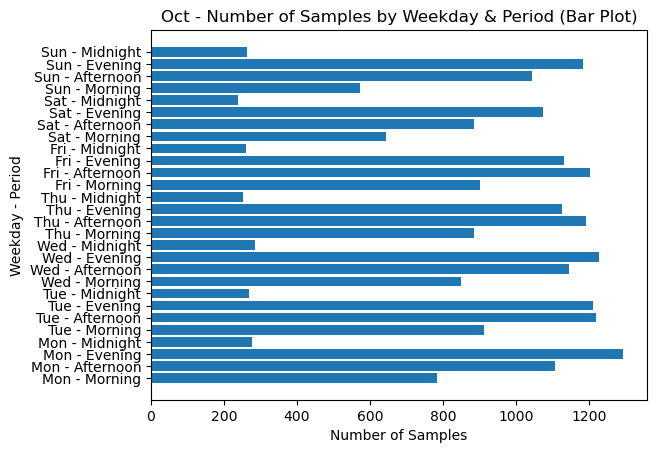

<Figure size 640x480 with 0 Axes>

In [18]:
# draw number of samples by weekday and period bar plot
ncreate_wd_prd = df_create_sep_oct.groupby(['weekday', 'period'])['hour'].count()
wd_prd = [w + ' - ' + p for w in wd for p in prd]
## Sep + Oct
plt.barh(wd_prd, ncreate_wd_prd)
plt.xlabel('Number of Samples')
plt.ylabel('Weekday - Period')
plt.title('Number of Samples by Weekday & Period (Bar Plot)')
plt.show()
plt.clf()
## Sep
ncreate_m_wd_prd_sep = df_create_sep.groupby(['weekday', 'period'])['hour'].count()
plt.barh(wd_prd, ncreate_m_wd_prd_sep)
plt.xlabel('Number of Samples')
plt.ylabel('Weekday - Period')
plt.title('Sep - Number of Samples by Weekday & Period (Bar Plot)')
plt.show()
plt.clf()
## Oct
ncreate_m_wd_prd_oct = df_create_oct.groupby(['weekday', 'period'])['hour'].count()
plt.barh(wd_prd, ncreate_m_wd_prd_oct)
plt.xlabel('Number of Samples')
plt.ylabel('Weekday - Period')
plt.title('Oct - Number of Samples by Weekday & Period (Bar Plot)')
plt.show()
plt.clf()

## Numeric

### like_count / comment_count

#### like count
- find relationship between like count (1-6h) and like count (24h)
    - **strong positive relationship**

#### comment count
- find relationship between comment count (1-6h) and like count (24h)    
    - **almost no relationship**
- find top 50 titles with highest comment(6h)-to-like(24h) ratio
    - **advertisement / lucky draw posts**
- find relationship between no-ad comment count (1-6h) and like count (24h)
    - **176 samples are advertisement posts** (about 0.4%)
    - **weak positive relationship**
- **🔥THOUGHTS🔥**
    - might need to add a new column to distinguish whether sample is an advertisement post (based on content or cmt-to-like ratio)
    - predict advertisement posts should ignore `comment` column

In [19]:
df_like = df.filter(regex='like').drop('like_count_24h', axis=1)
df_like.columns = df_like.columns.str.replace('like_count_', '')
df_cmt = df.filter(regex='comment')
df_cmt.columns = df_cmt.columns.str.replace('comment_count_', '')
print('Describe (Like):', df_like.describe(), sep='\n', end='\n\n')
print('Describe (Comment):', df_cmt.describe(), sep='\n')

Describe (Like):
                 1h            2h           3h            4h            5h  \
count  50000.000000  50000.000000  50000.00000  50000.000000  50000.000000   
mean       3.097500      5.224340      7.67098     10.249960     12.733960   
std       19.274621     24.516945     29.24685     35.367611     43.009398   
min        0.000000      0.000000      0.00000      0.000000      0.000000   
25%        0.000000      1.000000      2.00000      2.000000      3.000000   
50%        1.000000      3.000000      4.00000      5.000000      5.000000   
75%        3.000000      5.000000      7.00000      9.000000     11.000000   
max     4044.000000   4797.000000   5098.00000   5362.000000   5822.000000   

                 6h  
count  50000.000000  
mean      15.048340  
std       51.984946  
min        0.000000  
25%        3.000000  
50%        6.000000  
75%       12.000000  
max     6588.000000  

Describe (Comment):
                 1h            2h            3h            4h

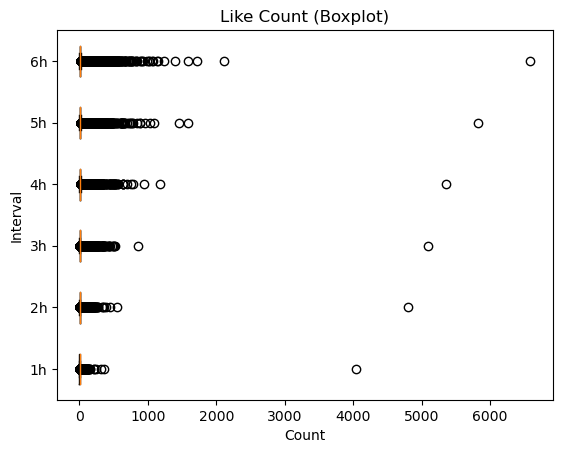

Like Correlation Matrix (Heatmap):
Axes(0.125,0.11;0.62x0.77)


,1h,2h,3h,4h,5h,6h
0,12,15,15,15,16,18
1,0,0,3,4,4,4
2,3,7,8,11,12,14
3,2,7,11,24,26,26
4,3,7,7,10,10,11
...,...,...,...,...,...,...
49995,1,1,1,1,1,2
49996,0,0,0,0,0,0
49997,0,0,0,2,2,3
49998,3,4,7,9,9,9


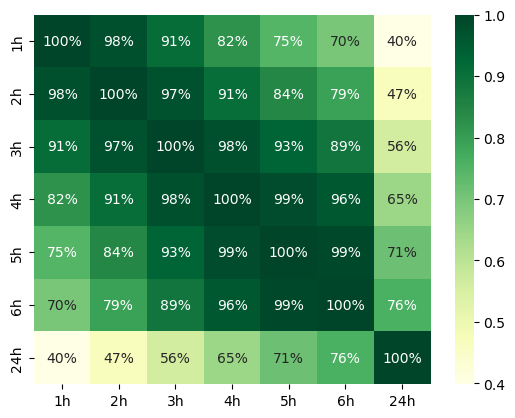

In [88]:
# find like count (1-6h) distribution
plt.boxplot(df_like, labels=df_like.columns, vert=False)
plt.xlabel('Count')
plt.ylabel('Interval')
plt.title('Like Count (Boxplot)')
plt.show()
plt.clf()

# find relationship between like count (1-6h) and like count (24h)
df_like_24h = df_like.copy(deep=True)
df_like_24h['24h'] = df['like_count_24h']
corr = df_like_24h.corr()
corr_mtx = sns.heatmap(corr, cmap='YlGn', annot=True, fmt='.0%')
print('Like Correlation Matrix (Heatmap):', corr_mtx, sep='\n')

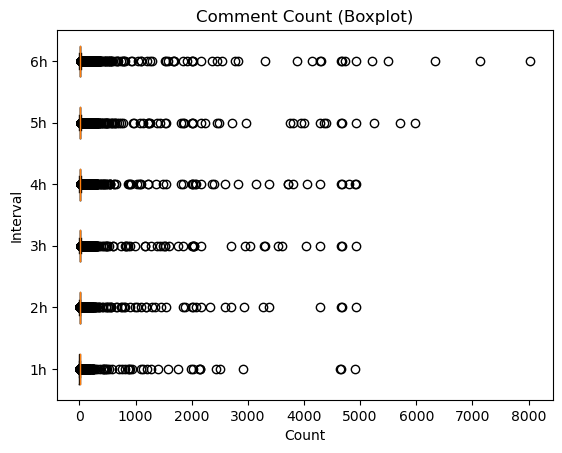

Comment Correlation Matrix (Heatmap):
Axes(0.125,0.11;0.62x0.77)


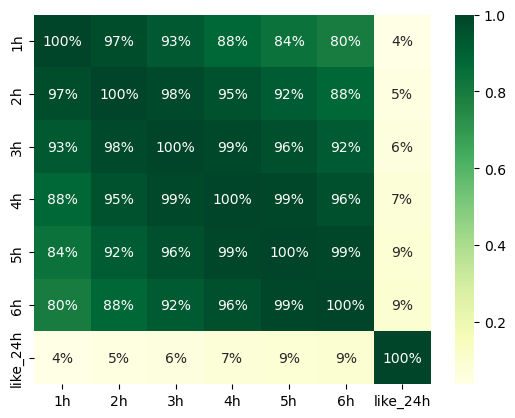

In [21]:
# find comment count (1-6h) distribution
plt.boxplot(df_cmt, labels=df_cmt.columns, vert=False)
plt.xlabel('Count')
plt.ylabel('Interval')
plt.title('Comment Count (Boxplot)')
plt.show()
plt.clf()

# find relationship between comment count (1-6h) and like count (24h)
df_cmt_24h = df_cmt.copy(deep=True)
df_cmt_24h['like_24h'] = df['like_count_24h']
corr = df_cmt_24h.corr()
corr_mtx = sns.heatmap(corr, cmap='YlGn', annot=True, fmt='.0%')
print('Comment Correlation Matrix (Heatmap):', corr_mtx, sep='\n')

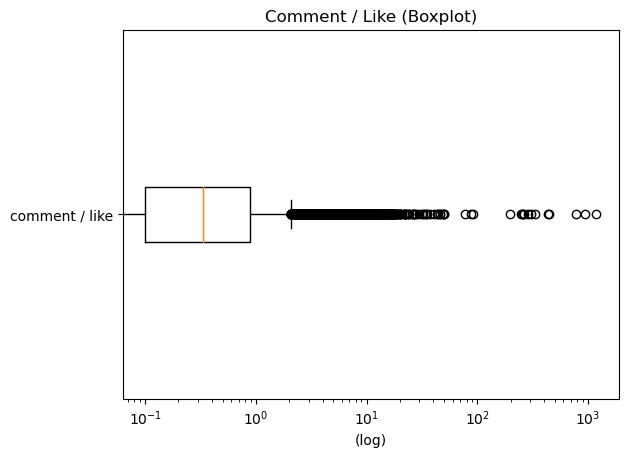

Top 50 Titles with Highest Cmt-to-like Ratio:
                                                   title     cmt/like
47623                                    #頁遊 又双是搶樓🥴（已結束）  1190.000000
13328                                           #頁遊 單人搶樓   936.600000
32023                          #頁遊 超快速抽羊駝 抽200隻 一人一百隻（結束   775.000000
8277                                    #頁遊 深夜(？)搶樓(已結束)   448.000000
17060                            #頁遊 （結束囉！）今天龍蛋文好多 這篇也是😡   434.583333
24007                                        #頁遊 抽蒂斯（截止）   333.000000
35071                                       #頁遊 小小截樓（截止）   306.071429
8761                                   #頁遊 確診無聊 來搶樓(´▽｀)   288.571429
34814                                  #頁遊 國慶小活動ㄧ截樓(已結束)   263.714286
48851                                   （已結束）不講你我他，抽傑尼*1   257.000000
32526                                         #頁遊 中秋節快樂🎉   251.909091
48132                                    #頁遊 半夜之小搶樓(已結束)   249.750000
33854                                      #

<Figure size 640x480 with 0 Axes>

In [22]:
# find distribution of comment(6h)-to-like(24h) ratio
df_cmt_24h_title = df_cmt_24h.copy(deep=True)
df_cmt_24h_title['title'] = df['title']
df_cmt_24h_title['cmt/like'] = df_cmt_24h_title['6h'] / df_cmt_24h_title['like_24h']
plt.boxplot(df_cmt_24h_title['cmt/like'], labels=['comment / like'], vert=False)
plt.xscale('log')
plt.xlabel('(log)')
plt.title('Comment / Like (Boxplot)')
plt.show()
plt.clf()

# find top 50 titles with highest Ratio
df_cmt_24h_title_more = df_cmt_24h_title.sort_values('cmt/like', ascending=False).head(50)
print('Top 50 Titles with Highest Cmt-to-like Ratio:', df_cmt_24h_title_more[['title', 'cmt/like']], sep='\n')

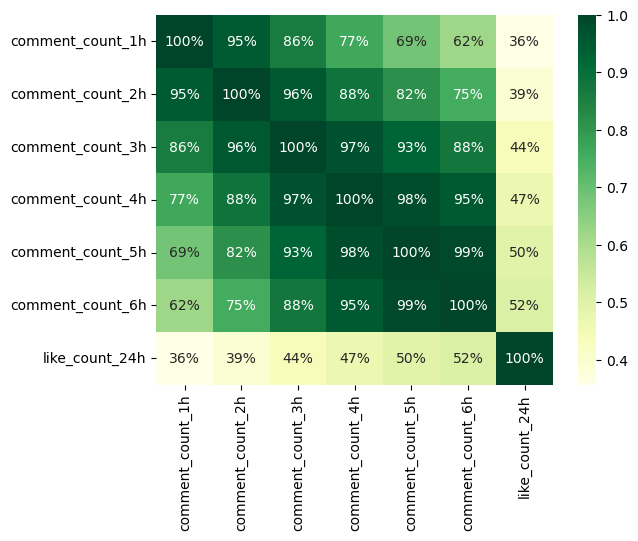

In [207]:
test = df.copy(deep=True)
test['cmt_to_like_6h'] = test['comment_count_6h'] / test['like_count_6h']
test['cmt_to_like_6h'] = test['cmt_to_like_6h'].replace(np.nan, 0).replace(np.inf, 0)
ind = test['cmt_to_like_6h'] <= 2
test = test[ind]
test = test[['comment_count_1h',
             'comment_count_2h',
             'comment_count_3h',
             'comment_count_4h',
             'comment_count_5h',
             'comment_count_6h',
             'like_count_24h']]
corr = test.corr()
corr_mtx = sns.heatmap(corr, cmap='YlGn', annot=True, fmt='.0%')

Number of No-ad Posts: 49824

No-ad Comment Correlation Matrix (Heatmap):
Axes(0.125,0.11;0.62x0.77)


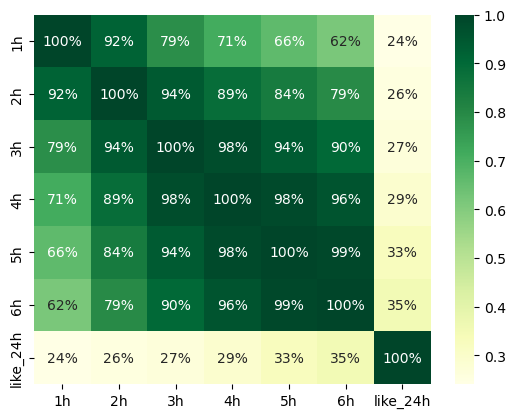

In [24]:
# find relationship between no-ad comment count (1-6h) and like count (24h)
ind = df_cmt_24h_title['cmt/like'] <= 10
df_cmt_24h_title_wo_ad = df_cmt_24h_title[ind].drop(['cmt/like'], axis=1)
print('Number of No-ad Posts:', len(df_cmt_24h_title_wo_ad), end='\n\n')
corr = df_cmt_24h_title_wo_ad.corr()
corr_mtx = sns.heatmap(corr, cmap='YlGn', annot=True, fmt='.0%')
print('No-ad Comment Correlation Matrix (Heatmap):', corr_mtx, sep='\n')

### forum_stats
- check if forum id and forum stats are of one-to-one relationship
    - **only forum id 47568 has two different forum stats**
- find relatoinship between forum stats and like by forum id
    - **almost no relationship**
- **🔥THOUGHTS🔥**
    - `forum_stats` column is a property of `forum_id` (only 2 sample does not apply)
    - `forum_stats` cannot replace `forum_id` when predicting samples

In [25]:
print('Describe (Forum Stats):', df['forum_stats'].describe(), sep='\n')

Describe (Forum Stats):
count    50000.000000
mean       116.125080
std        206.109233
min          0.000000
25%         16.300000
50%         38.000000
75%         93.700000
max       1128.300000
Name: forum_stats, dtype: float64


Describe (Number of Forum Stats by Forum ID):
count    1147.000000
mean        1.000872
std         0.029527
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: forum_stats, dtype: float64

'forum_id' and 'forum_stats' are of one-to-one relationship: False



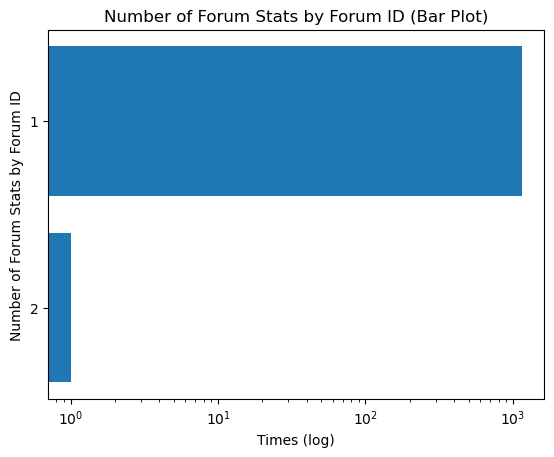

<Figure size 640x480 with 0 Axes>

In [26]:
# check if forum id and forum stats are of one-to-one relationship
df_forum = df[['forum_id', 'forum_stats']]
nstats_id = df_forum.groupby('forum_id')['forum_stats'].nunique()
print('Describe (Number of Forum Stats by Forum ID):', nstats_id.describe(), sep='\n', end='\n\n')
print("'forum_id' and 'forum_stats' are of one-to-one relationship:", nstats_id.max() == 1, end='\n\n')
n_nstats_id = nstats_id.value_counts().sort_values()
plt.barh(n_nstats_id.index.astype(str), n_nstats_id)
plt.xscale('log')
plt.xlabel('Times (log)')
plt.ylabel('Number of Forum Stats by Forum ID')
plt.title('Number of Forum Stats by Forum ID (Bar Plot)')
plt.show()
plt.clf()

In [27]:
# find the only forum id with multiple forum stats
id_multi_stats = nstats_id[nstats_id == 2].index[0]
print('Only Forum ID with Multiple Forum Stats:', id_multi_stats, end='\n\n')
ind = df_forum['forum_id'] == id_multi_stats
nstats = df_forum[ind]['forum_stats'].value_counts()
print('Number of Forum stats of Forum ID (' + str(id_multi_stats) + '):', nstats, sep='\n')

Only Forum ID with Multiple Forum Stats: 47568

Number of Forum stats of Forum ID (47568):
18.2    15
0.1      2
Name: forum_stats, dtype: int64


In [28]:
# find relatoinship between forum stats and like by forum id
df_forum_like = df_forum.copy(deep=True)
df_forum_like['like_count_24h'] = df['like_count_24h']
ind = (df_forum_like['forum_id'] == 47568) & (df_forum_like['forum_stats'] == 0.1)
df_forum_like_drop = df_forum_like[~ind]
df_forum_like_drop_by_id = df_forum_like_drop.groupby('forum_id')[['forum_stats', 'like_count_24h']].median()
corr_stats_like = df_forum_like_drop_by_id['forum_stats'].corr(df_forum_like_drop_by_id['like_count_24h'])
print('Correlation Between Forum Stats and Like:', round(corr_stats_like, 2))

Correlation Between Forum Stats and Like: -0.03
